#Group Assignment

# **Programming for Machine Learning**

House Price Prediction

Authors:


1.   Kau Ntatedi Eunah



        
        

#**Import Data and Data Imputation**

In [ ]:
#Import the pandas package to be able to use its methods
import pandas as pd

In [ ]:
#import and read our dataset
df=pd.read_csv(r'house_price.csv')

In [ ]:
#Print the dataframe to give us an overview of the dataset
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [ ]:
#We would like to obtain a condensed version of the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Condensing the dataset can help identify essential features. We can focus on relevant variables and exclude noise. It also allows quicker exploration and visualization, to be able to navigate the EDA process of the larger dataset.

In [ ]:
#Checking whether there are missing values in the dataframe
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


Even though the cell(df.info) above would have showed us which columns  have null values. But here we are trying to see which particular cell of the table in the dataset is actually containing a null value by returning true for the cell that has a null value

In [ ]:
#Check the number of missing values per feature
#Display all rows without truncation
pd.options.display.max_rows = None
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


This code cell will infact navigate our focus on which columns we should carry data imputations on.

In [ ]:
# Impute data with mean values for float data type
mean__value=df['LotFrontage'].mean()

df ['LotFrontage'].fillna(value=mean__value,inplace=True)

df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [ ]:
#Replace the missing value by the last valid value
df['Electrical'].bfill(inplace=True)

df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


For the numerical-valued columns, we have opted to use the 'fiilna' method for the 'lot frontage' to fill the missing values with the mean value of the column.
We also used the 'bfill' method to back fill the one missing value of the 'Electrical' column with the previous value.

In [ ]:
#Replace the null values in other columns with corresponding string values
df['Alley'].fillna('NoAlley', inplace=True)

df['MasVnrType'].fillna('NoMasVnr', inplace=True)

df['BsmtQual'].fillna('NoBsmt', inplace=True)

df['BsmtCond'].fillna('NoBsmt', inplace=True)

df['BsmtExposure'].fillna('NoBsmt', inplace=True)

df['BsmtFinType1'].fillna('NoBsmt', inplace=True)

df['BsmtFinType2'].fillna('NoBsmt', inplace=True)

df['FireplaceQu'].fillna('NoFP', inplace=True)

df['GarageType'].fillna('NoGrge', inplace=True)

df['GarageYrBlt'].fillna('NoGrge', inplace=True)

df['GarageFinish'].fillna('NoGrge', inplace=True)

df['GarageQual'].fillna('NoGrge', inplace=True)

df['GarageCond'].fillna('NoGrge', inplace=True)

df['PoolQC'].fillna('NP', inplace=True)

df['Fence'].fillna('NoFnc', inplace=True)

df['MiscFeature'].fillna('NoMiscF', inplace=True)

df.isnull().sum()

<ipython-input-9-6b229aa9a37f>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NoGrge' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['GarageYrBlt'].fillna('NoGrge', inplace=True)


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
Alley,0
LotShape,0
LandContour,0
Utilities,0


For the categorical-valued columns, we opted to replace the None values(i.e. values that where tagged as null by the '.isnull()'  method) using the '.fillna()' method instead of using the '.replace()' as that particular method would be suitable for replacing a specific string value , not for replacing missing data represented by NaN.

In [ ]:
#Drop rows that still have missing values
df.dropna(inplace=True)
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
Alley,0
LotShape,0
LandContour,0
Utilities,0


#**Data** **Validation**

In [ ]:
#We count zeros so we can clearly see if the values dont represent the context and nature of the data

#Create a function to count the numbers of zeros in our dataframe
def zero_count():

# Count number of zeros in all columns of Dataframe
  for column_name in df.columns:
      column = df[column_name]
      # Get the count of Zeros in column
      count = (column == 0).sum()
      print('Count of zeros in column ', column_name, ' is : ', count)

#call the function
zero_count()

Count of zeros in column  Id  is :  0
Count of zeros in column  MSSubClass  is :  0
Count of zeros in column  MSZoning  is :  0
Count of zeros in column  LotFrontage  is :  0
Count of zeros in column  LotArea  is :  0
Count of zeros in column  Street  is :  0
Count of zeros in column  Alley  is :  0
Count of zeros in column  LotShape  is :  0
Count of zeros in column  LandContour  is :  0
Count of zeros in column  Utilities  is :  0
Count of zeros in column  LotConfig  is :  0
Count of zeros in column  LandSlope  is :  0
Count of zeros in column  Neighborhood  is :  0
Count of zeros in column  Condition1  is :  0
Count of zeros in column  Condition2  is :  0
Count of zeros in column  BldgType  is :  0
Count of zeros in column  HouseStyle  is :  0
Count of zeros in column  OverallQual  is :  0
Count of zeros in column  OverallCond  is :  0
Count of zeros in column  YearBuilt  is :  0
Count of zeros in column  YearRemodAdd  is :  0
Count of zeros in column  RoofStyle  is :  0
Count of ze

We decided to count the number of zeros in the dataframe for each column to validate the results. Sometimes the zero might indicate a missing value or a type error and not reflect the true nature of the entry.

In [ ]:
# Validate the zeros in the MasVnrArea
# Print rows where the MasVnrArea is zero but the MasVnrType is not NoMasVnr

rows_with_issues = df[(df['MasVnrArea']==0)&(df['MasVnrType']!= 'NoMasVnr')]
print(rows_with_issues)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
688    689          20       RL         60.0     8089   Pave  NoAlley   
1241  1242          20       RL         83.0     9849   Pave  NoAlley   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
688       Reg         HLS    AllPub  ...        0     NP  NoFnc     NoMiscF   
1241      Reg         Lvl    AllPub  ...        0     NP  NoFnc     NoMiscF   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
688        0     10   2007       New        Partial     392000  
1241       0      6   2007       New        Partial     248328  

[2 rows x 81 columns]


The above code will help to identify any inconsistencies in the dataset where the house has a masonry veneer type ('MasVnrType') but no corresponding area('MasVnrArea' is 0), which may indicate a data quality issue.

This is done to validate the zero values in the dataframe after some data imputation was done. In this case we are focusing on the each column that has zero values starting with the MasVnrArea.

In [ ]:
#Drop the rows where the MasVnrARea is 0 but MasVnrType is not "NoMasVnr"
df_cleaned=df.drop(rows_with_issues.index,inplace=True)

#Verify that the rows have been dropped
print( df[(df['MasVnrArea']==0)&(df['MasVnrType']!= 'NoMasVnr')])

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


In this case instead of replacing the values with the mean number ,we thought it be appropriate to drop the rows as it would be difficult to get the mean area for the different types of Veneer , and additionally there are just two rows with data quality issues , so dropping wouldnt significantly change our model learning process.

In [ ]:
#Check for inconsistences where TotalBsmtSF(Total basement square feet) is 0 but other areas are not

inconsistent_total=df[(df['TotalBsmtSF']==0)&
                      ((df['BsmtFinSF1']>0)|
                       (df['BsmtFinSF2']>0)|
                       (df['BsmtUnfSF']>0))]

#Check if any inconsistencies exist where BsmttQual or BsmtCond is 'NoBsmt' but TotalBsmt is not 0
inconsistent_basement= df[(df['TotalBsmtSF']>0)&
                          ((df['BsmtQual']=='NoBsmt')|
                           (df['BsmtCond']=='NoBsmt'))]

print('Inconsistent rows where TotalBsmtSF is 0 but other basement areas are non-zero:')
print(inconsistent_total)

print('\nInconsistent rows where the BsmtQual or BsmtCond is \'NoBsmt\' but TotalBsmtSF is not 0:')
print(inconsistent_basement)

Inconsistent rows where TotalBsmtSF is 0 but other basement areas are non-zero:
Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, Yr

Secondly we proceeded to validate the zero in the basement-related columns('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',and 'TotalBsmtSF').The first part of the above code checks for cases where 'TotalBsmtSF' is zero but one or more of the other basement-related columns have non-zero values.This is considered to be inconsistent because if the total basement area is zero, then all sub-areas should be zero.

The second part of the code checks for rows where 'TotalBsmtSF' is greater than zero (indicating that there is a basement),but the 'BsmtQual' or "BsmtCond' are set to 'NoBsmt'. This is likely incorrect because if there is a basement ,there should be some quality or condition data associated with it.

In [ ]:
# Validate the zeros in the KitchenAbvGr
# Print rows where the KitchenAbvGr is zero but the KitchenAbvGr is not 'NaN'

kitchen_inconsistencies = df[(df['KitchenAbvGr']==0)&(df['KitchenQual']!= 'NaN')]
print(kitchen_inconsistencies)

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
954  955          90       RL         35.0     9400   Pave  NoAlley      IR1   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
954         Lvl    AllPub  ...        0     NP  NoFnc     NoMiscF       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
954     10   2006        WD        AdjLand     127500  

[1 rows x 81 columns]


In [ ]:
#Drop the rows where the KitchenAbvGr is 0 but KitchenAbvGr is not "NaN"
df_cleaned=df.drop(kitchen_inconsistencies.index,inplace=True)

#Verify that the rows have been dropped
print( df[(df['KitchenAbvGr']==0)&(df['KitchenQual']!= 'NaN')])

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


In [ ]:
# Validate the zeros in the PoolArea
# Print rows where the PoolArea is zero but the PoolQC is not 'NP'

pool_inconsistencies = df[(df['PoolArea']==0)&(df['PoolQC']!= 'NP')]
print(pool_inconsistencies)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


In [ ]:
# Validate the zeros in the MiscVal
# Print rows where the MiscVal is zero but the MiscFeature is not 'NoMiscF'

miscellaneous_feature_inconsistencies = df[(df['MiscVal']==0)&(df['MiscFeature']!= 'NoMiscF')]
print(miscellaneous_feature_inconsistencies)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
873    874          40       RL         60.0    12144   Pave  NoAlley   
1200  1201          20       RL         71.0     9353   Pave  NoAlley   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
873       Reg         Lvl    AllPub  ...        0     NP  NoFnc        Othr   
1200      Reg         Lvl    AllPub  ...        0     NP  NoFnc        Shed   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
873        0      9   2009        WD         Normal     133000  
1200       0      7   2006       Oth        Abnorml     116050  

[2 rows x 81 columns]


In the above we proceeded to validate the zero values in the columns of ('KitchenAbvGr', 'PoolArea', 'MiscVal') with related data columns. We then dropped the rows where inconsistencies occured.

For other columns, there was insufficient data to validate the zero values present in the columns , we assumed that the entered zero values were valid for their entries

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

0

In [ ]:
#Print the dataframe to give us an overview of the new improved dataset
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlley   
1        2          20       RL         80.0     9600   Pave  NoAlley   
2        3          60       RL         68.0    11250   Pave  NoAlley   
3        4          70       RL         60.0     9550   Pave  NoAlley   
4        5          60       RL         84.0    14260   Pave  NoAlley   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlley   
1456  1457          20       RL         85.0    13175   Pave  NoAlley   
1457  1458          70       RL         66.0     9042   Pave  NoAlley   
1458  1459          20       RL         68.0     9717   Pave  NoAlley   
1459  1460          20       RL         75.0     9937   Pave  NoAlley   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...    

#**Correlation** **and Encoding**

In [ ]:
#Apply One_hot Encoding to categorical columns to convert the categorical data into numerical data
df_encoded = pd.get_dummies(df,drop_first=True)

#check the transformed DataFrame
print(df_encoded.head())

#calculate the correlation matrix
correlation_matrix=df_encoded.corr()


#Display the corelation matrix
pd.options.display.max_rows = None
pd.options.display.max_columns= None
print(correlation_matrix)


Streaming output truncated to the last 5000 lines.
Fireplaces                      -0.183294            -0.183294   
GarageCars                      -0.571406            -0.571406   
GarageArea                      -0.534869            -0.534869   
WoodDeckSF                      -0.104973            -0.104973   
OpenPorchSF                     -0.035939            -0.035939   
EnclosedPorch                    0.063346             0.063346   
3SsnPorch                       -0.028232            -0.028232   
ScreenPorch                     -0.065585            -0.065585   
PoolArea                        -0.016669            -0.016669   
MiscVal                          0.005126             0.005126   
MoSold                          -0.022473            -0.022473   
YrSold                           0.014955             0.014955   
SalePrice                       -0.236637            -0.236637   
MSZoning_FV                     -0.051109            -0.051109   
MSZoning_RH              

One-Hot Encoding converts categorical variables into a new set of binary variables(dummmy variables) for each unique category, it is most suitable for non-binary categories.
'drop_first=True': Drops the first level of each categorical varible to avoid multicollinearity.With One-Hot Encoding, each categoory of a categorical variable is represented  by a separate column. But if we include all these encoded columns in a regression model we might introduce multicollinearity.

Once the categorical variables are converted to numerical data, the correlation matrix can be calculated as usual using 'df.corr()'.



In [ ]:
#Calculate the correlation of all features with SalePrice
correlation_with_saleprice = df_encoded.corr()['SalePrice'].sort_values(ascending=False)

#Display the correlations
print(correlation_with_saleprice)

SalePrice                1.000000
OverallQual              0.789937
GrLivArea                0.712074
GarageCars               0.640731
GarageArea               0.623293
TotalBsmtSF              0.612830
1stFlrSF                 0.606862
FullBath                 0.562905
TotRmsAbvGrd             0.536888
YearBuilt                0.522074
YearRemodAdd             0.506217
Foundation_PConc         0.496317
MasVnrArea               0.480848
Fireplaces               0.469641
ExterQual_Gd             0.454879
BsmtFinType1_GLQ         0.433712
Neighborhood_NridgHt     0.398067
BsmtFinSF1               0.384575
SaleType_New             0.350363
SaleCondition_Partial    0.344819
FireplaceQu_Gd           0.335754
GarageType_Attchd        0.334434
LotFrontage              0.334392
MasVnrType_Stone         0.334029
Neighborhood_NoRidge     0.333975
2ndFlrSF                 0.325418
WoodDeckSF               0.325151
KitchenQual_Gd           0.322945
OpenPorchSF              0.313155
BsmtExposure_G

In [ ]:
#Select top 10 positively correlated features with SalePrice
top_positive_correlations= correlation_with_saleprice.head(11)

#Select top 5 negatively correlated features with SalePrice
top_negative_correlations =correlation_with_saleprice.tail(5)

#Combine them into one list (excluding SalePrice)
top_features = list(top_positive_correlations.index[1:])+ list(top_negative_correlations.index)

#Display the selected features
print('Top features most correlated wiith SalePrice:')
print(top_features)


Top features most correlated wiith SalePrice:
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageFinish_Unf', 'BsmtQual_TA', 'FireplaceQu_NoFP', 'KitchenQual_TA', 'ExterQual_TA']


We decided to find the most correlated features with the SalePrice so we minimise the features we need to carry out the univariate and bivariate analysis on, to enable us to do the prediction. We decided to include in the scope, 10 positively and 5 negatively features correlated with the SalePrice

#**Univariate Analysis**

In [ ]:
#Correct the top features list due to the dummies present in the set
actual_top_features=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageFinish', 'BsmtQual', 'FireplaceQu', 'KitchenQual', 'ExterQual']
#Display the data types of thetop features
top_features_dtypes = df[actual_top_features].dtypes

#print the data types
print(top_features_dtypes)

OverallQual      int64
GrLivArea        int64
GarageCars       int64
GarageArea       int64
TotalBsmtSF      int64
1stFlrSF         int64
FullBath         int64
TotRmsAbvGrd     int64
YearBuilt        int64
YearRemodAdd     int64
GarageFinish    object
BsmtQual        object
FireplaceQu     object
KitchenQual     object
ExterQual       object
dtype: object


We checked for the data types for the most related features with the SalePrice so we are able to proceed with our univariate analysis.This will help us  know which type of graph to plot while performing the analysis.But in order to check for these datatypes we need to change the encoded columns back to the original columns in the dataframe.

As we have many rows in the original dataframe, this would mean more analysis needs to be carried out. This would also be of little significance because some features are weakly correlated with the SalePrice, and would ultimately consume more time.

**OverallQual Distribution**

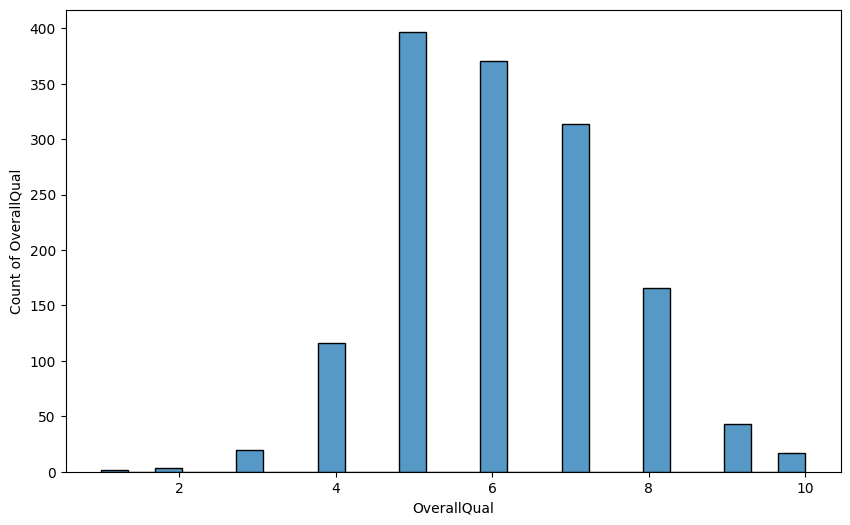

In [ ]:
import matplotlib.pyplot as plt

#Using seaborn to plot histogram of OverallQual

import seaborn as sns #Imports

plt.figure(figsize = (10, 6)) #Defining plot size
sns.histplot(data = df, x='OverallQual', bins = 'auto') #Creating the histogram
plt.xlabel('OverallQual') #Adding a label to the x axis
plt.ylabel('Count of OverallQual') #Adding a label to the y axis
plt.show() #Displaying the histogram plot



*   The Overall quality scale lies between 0 and 10.
*   Most houses are rated to be 5 in terms of their overall quality.





**Distribution of the Grade Living Area**

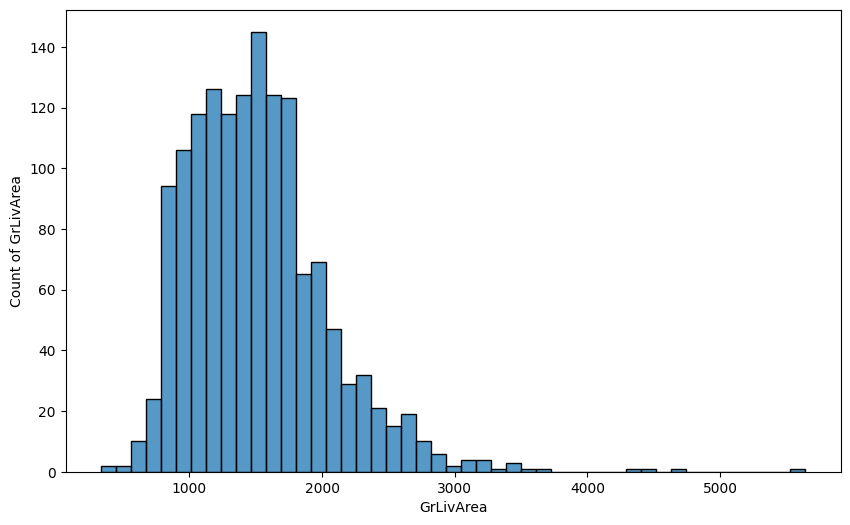

In [ ]:
#Using seaborn to plot histogram of GrLivArea
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x='GrLivArea', bins = 'auto')
plt.xlabel('GrLivArea')
plt.ylabel('Count of GrLivArea')
plt.show()



*   The Grade living area of the houses range from approximately 500SF-5900SF
*   With the most house having approximately 2500SF grade living area



**Garage Cars Distribution**

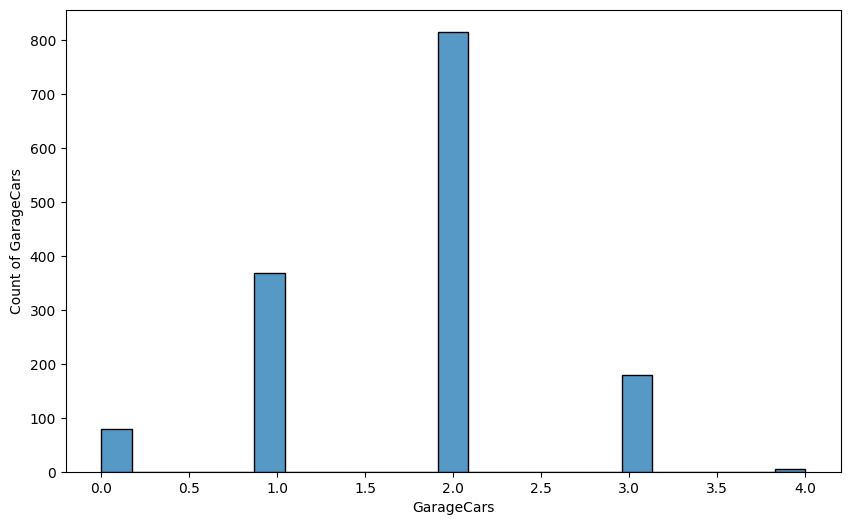

In [ ]:
#Using seaborn to plot histogram of GarageCars
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x='GarageCars', bins = 'auto')
plt.xlabel('GarageCars')
plt.ylabel('Count of GarageCars')
plt.show()



*   Most houses have garages that could accommodate 2 cars




**Garage Area Distribution**

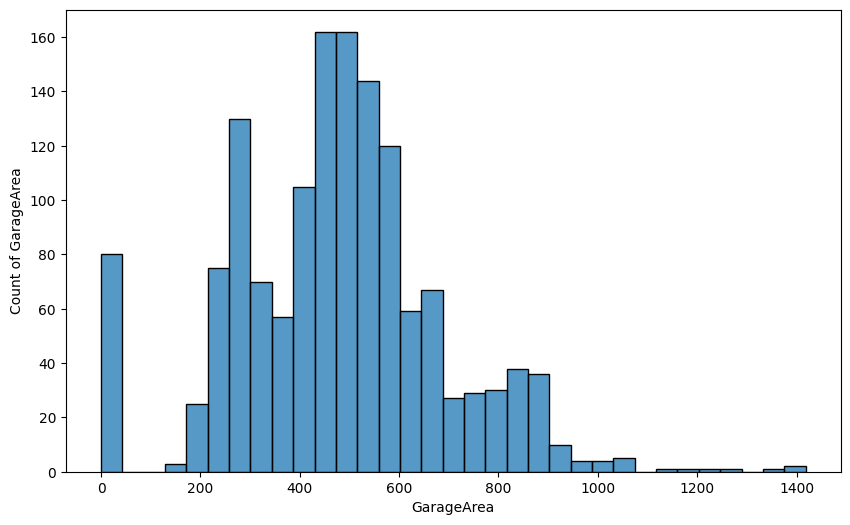

In [ ]:
#Using seaborn to plot histogram of GarageArea
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x='GarageArea', bins = 'auto')
plt.xlabel('GarageArea')
plt.ylabel('Count of GarageArea')
plt.show()



*   The garage area ranges from 0-1400 SF
*   The extreme range accommodating up to 4 cars at most



**Total basement Square Feet Distribution**

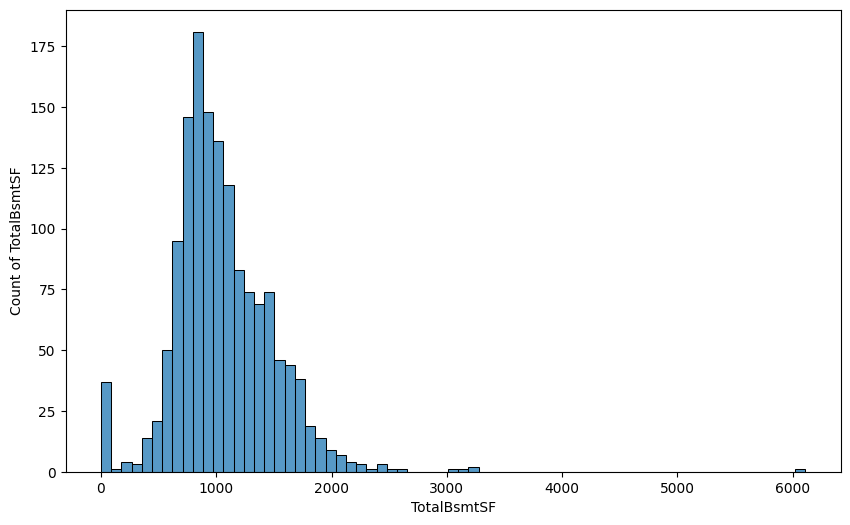

In [ ]:
#Using seaborn to plot histogram of TotalBsmtSF
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x='TotalBsmtSF', bins = 'auto')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Count of TotalBsmtSF')
plt.show()



*   The total basement square feet for the houses range from 0-4000 SF with and an outlier house with basement of of 6000SF



**The Distribution of the Fist Floor Square Feet**

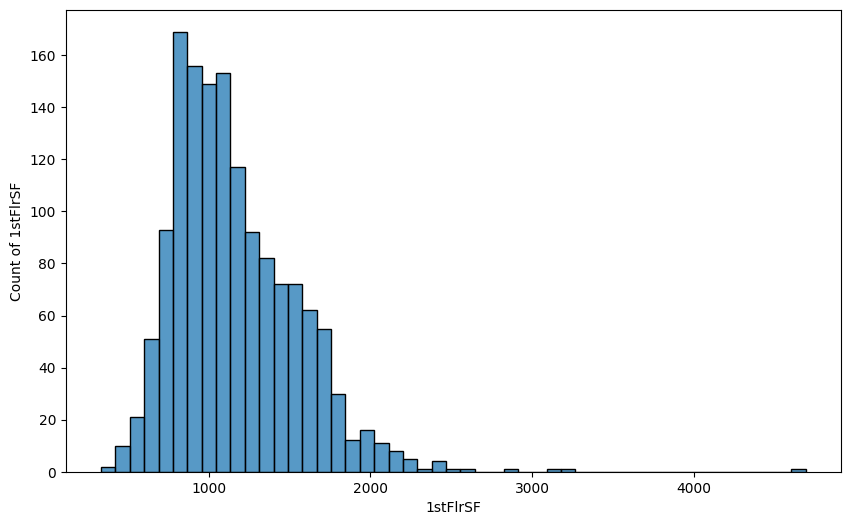

In [ ]:
#Using seaborn to plot histogram of 1stFlrSF
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x='1stFlrSF', bins = 'auto')
plt.xlabel('1stFlrSF')
plt.ylabel('Count of 1stFlrSF')
plt.show()



*   The house have a 1st floor area square feet ranging from approximately 500-3500SF.
*   There is an outliner with a 1st floor area of more than 4000SF.

*   Most houses have a 1st floor area of approximately 800SF.





**Full Bath Distribution**

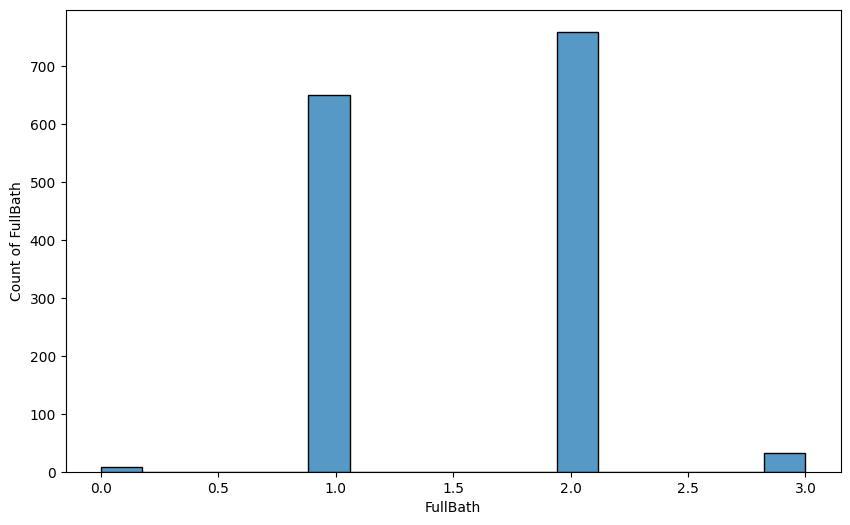

In [ ]:
#Using seaborn to plot histogram of FullBath
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x='FullBath', bins = 'auto')
plt.xlabel('FullBath')
plt.ylabel('Count of FullBath')
plt.show()



*   Most houses have two full bathrooms
*   Houses  have at most 3 full bathrooms
*   Few houses have 0 full bathrooms






**Total Rooms Above Grade Distribution**

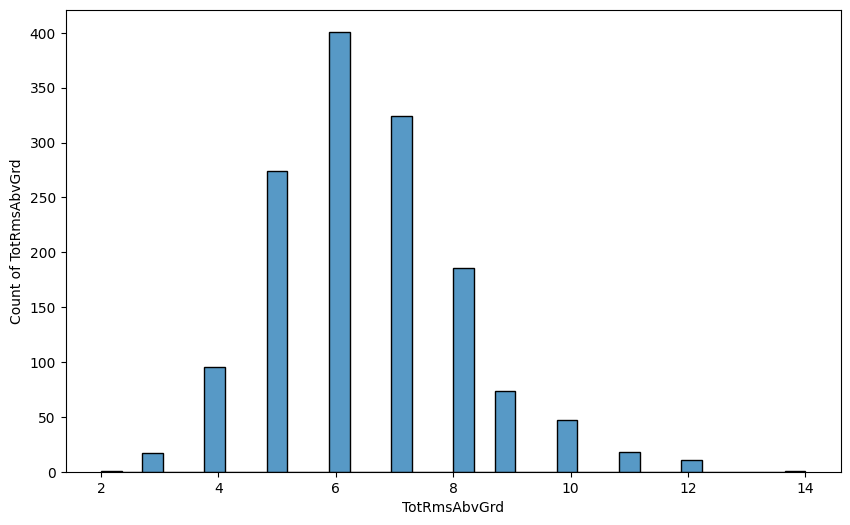

In [ ]:
#Using seaborn to plot histogram of TotRmsAbvGrd
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x='TotRmsAbvGrd', bins = 'auto')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Count of TotRmsAbvGrd')
plt.show()



*  The number of total rooms above ground for the houses range from 2-14
*  Most houses have 6 rooms above ground which excludes bathroom



**Year Built Distribution**

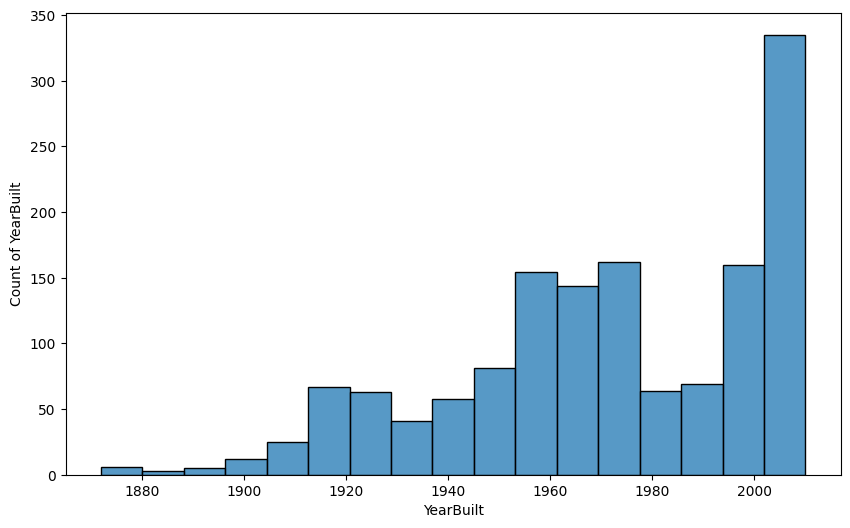

In [ ]:
#Using seaborn to plot histogram of YearBuilt
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x='YearBuilt', bins = 'auto')
plt.xlabel('YearBuilt')
plt.ylabel('Count of YearBuilt')
plt.show()



*   The  years that houses were built in range from late 18th centuring to the early 20th century(1870s-2000s).
*   Most houses were built in the 20th century.
*   Fewer houses were built in the 18th century.





**Remodel Date Distribution**

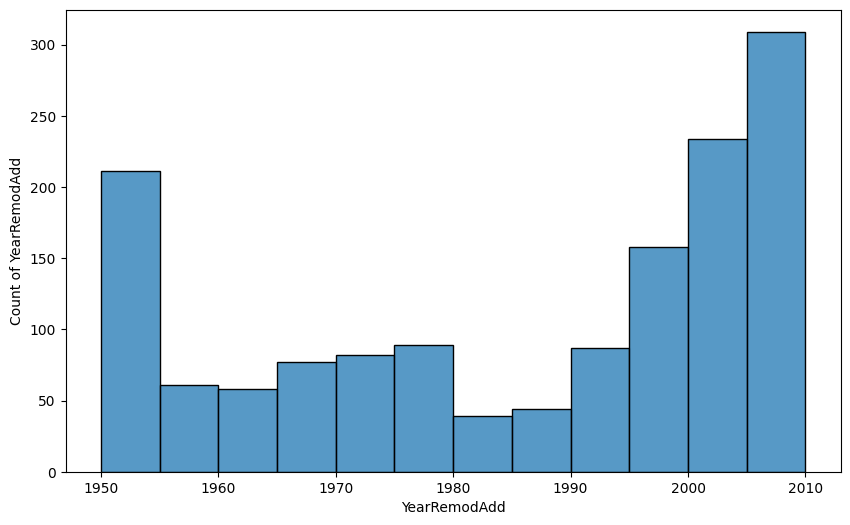

In [ ]:
#Using seaborn to plot histogram of YearRemodAdd
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x='YearRemodAdd', bins = 'auto')
plt.xlabel('YearRemodAdd')
plt.ylabel('Count of YearRemodAdd')
plt.show()



*  The remodel dates for the houses range from the 1950s to 2010
*  Most houses were remodelled between the years 2000s  and 2010



**SalePrice Distribution**

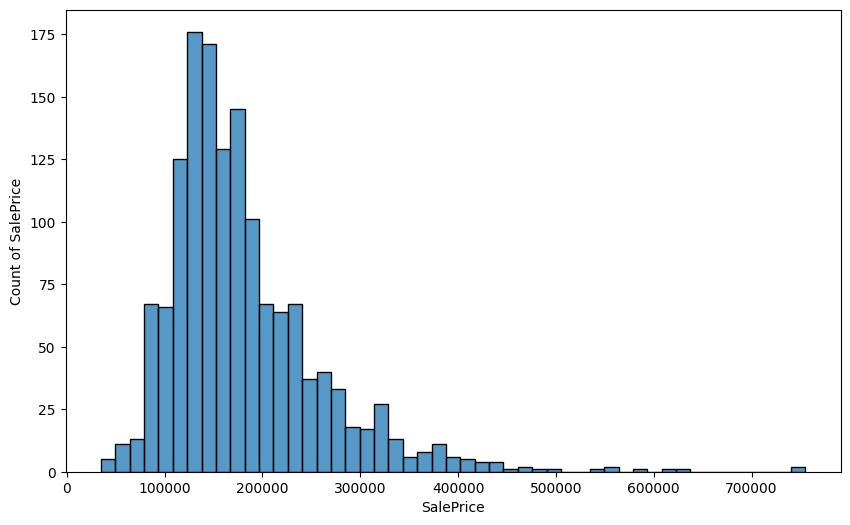

In [ ]:
#Using seaborn to plot histogram of SalePrice
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x='SalePrice', bins = 'auto')
plt.xlabel('SalePrice')
plt.ylabel('Count of SalePrice')
plt.show()

Most houses range  from 100 000-300 000, with an outlier of over 700 000 in sale price

**The Distribution of Garage Finish**

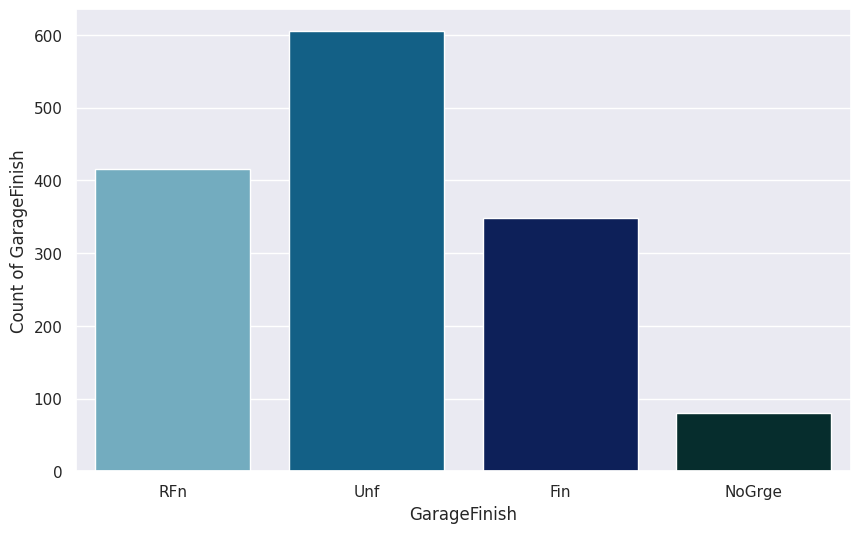

In [ ]:
#Using seaborn to plot Bar Chart of GarageFinish

sns.set_theme(style = 'darkgrid') #Setting the plot style
plt.figure(figsize = (10, 6)) #Defining plot size
sns.countplot(data = df, x = 'GarageFinish', hue='GarageFinish',palette = 'ocean_r',legend=False) #Creating the bar chart

plt.xlabel('GarageFinish') #Adding a label to x axis
plt.ylabel('Count of GarageFinish') #Adding a label to y axis
plt.show() #Displaying the bar chart



*   Most houses(over 600) have UnFinished garages
*   Less than 100 houses have no garages.


*   Less than 400 house have Finished garages.





**Basement Quality(Basement Height) Distribution**

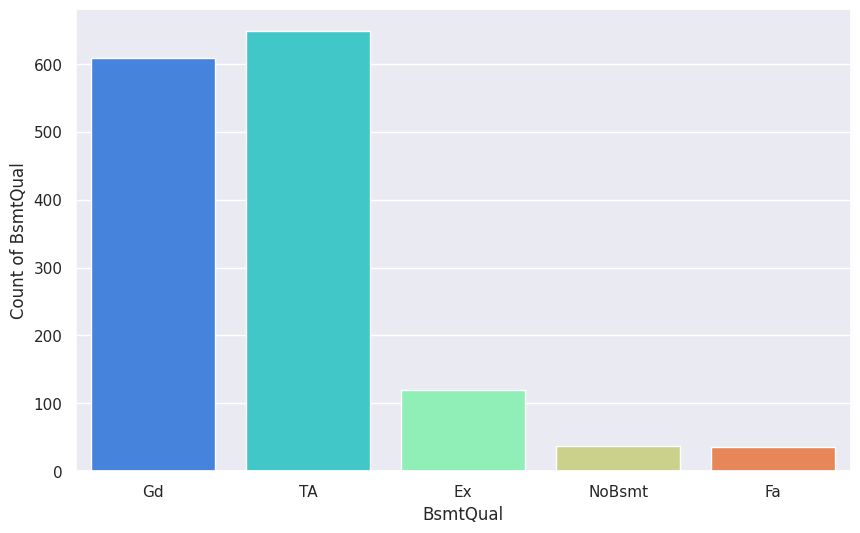

In [ ]:
#Using seaborn to plot Bar Chart of BsmtQual

sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'BsmtQual', hue='BsmtQual',palette = 'rainbow',legend=False)

plt.xlabel('BsmtQual')
plt.ylabel('Count of BsmtQual')
plt.show()



*   Most houses have a basement quality that is typical(80-89 inches)
*   The count of houses that have no  basement is relatively equal to the count of houses with a basement with fair quality(70-79 inches)
*The count of houses with basement quality of good(90-99 inches) and typical are(80-89 inches) are over 600



**Fireplace Quality Distribution**

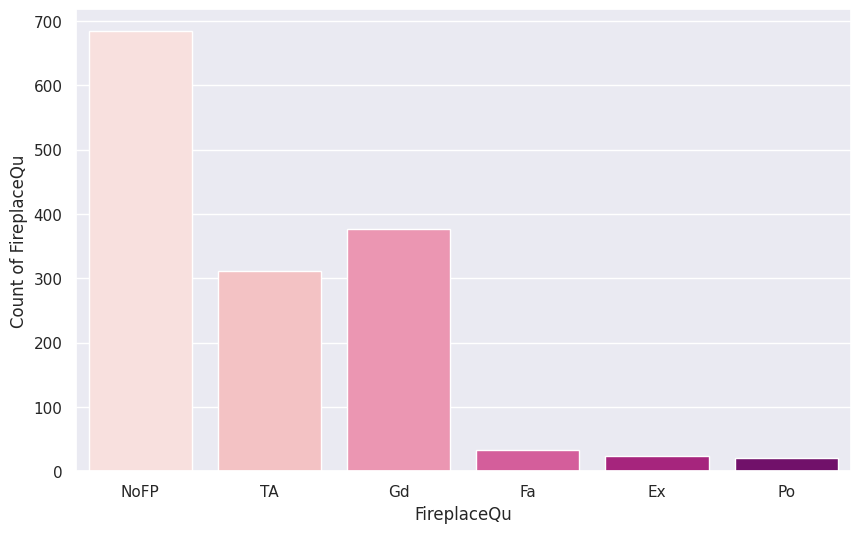

In [ ]:
#Using seaborn to plot Bar Chart of Gender

sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'FireplaceQu', hue='FireplaceQu',palette = 'RdPu',legend=False)

plt.xlabel('FireplaceQu')
plt.ylabel('Count of FireplaceQu')
plt.show()



*   Most houses(nearly 700) have no fireplace
*   The count of the house with a fireplace that is has an excellent quality is realtively the same as the count of houses with poor quality.



**Kitchen Quality Disitribution**

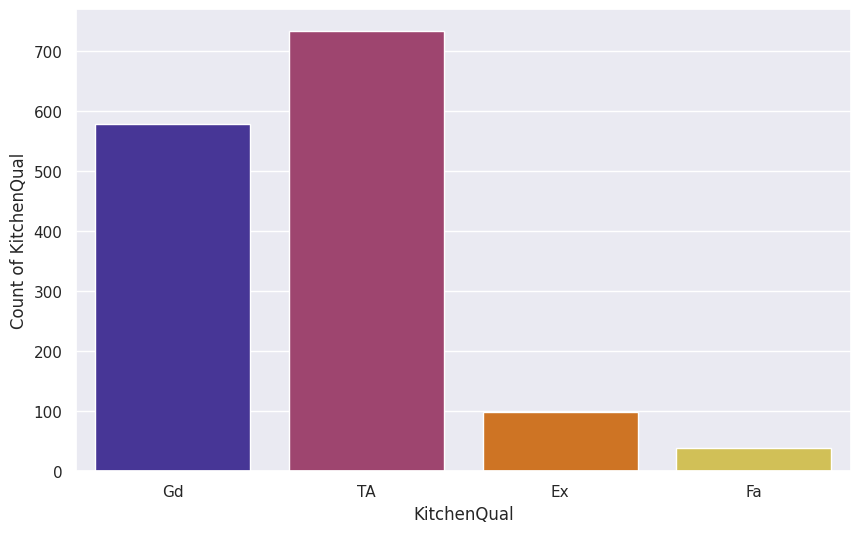

In [ ]:
#Using seaborn to plot Bar Chart of Gender

sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'KitchenQual', hue='KitchenQual', palette = 'CMRmap',legend=False)

plt.xlabel('KitchenQual')
plt.ylabel('Count of KitchenQual')
plt.show()



*  Most houses have typical/average kitchen quality.
*  Approximately 100 house have excellent kitchen quality



**Exterior Quality Distribution**

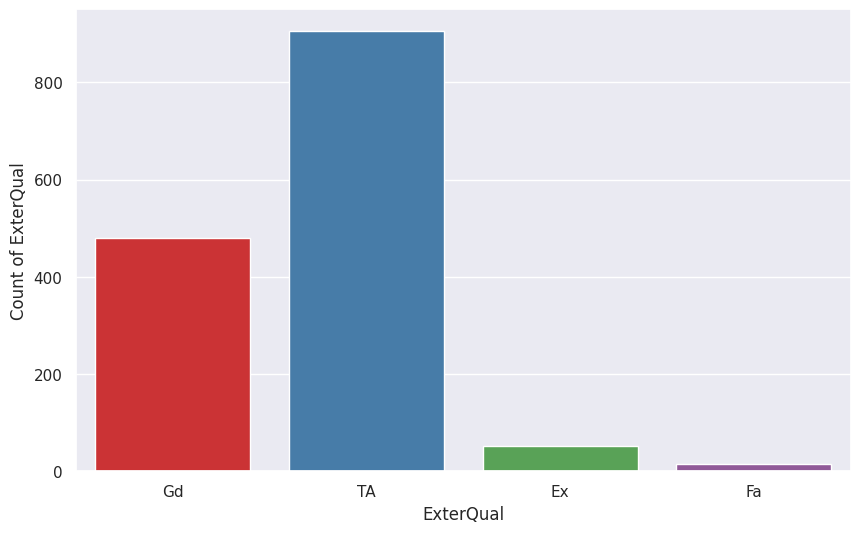

In [ ]:
#Using seaborn to plot Bar Chart of Gender

sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'ExterQual', hue='ExterQual',palette = 'Set1',legend=False)

plt.xlabel('ExterQual')
plt.ylabel('Count of ExterQual')
plt.show()



*   Most houses have a typical/average quality of material of the exterior




#**Bivariate Analysis**

# **Numeric Vs Numeric**

**SalePrice by Overall Quality of house**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.7% of the points cannot be plac

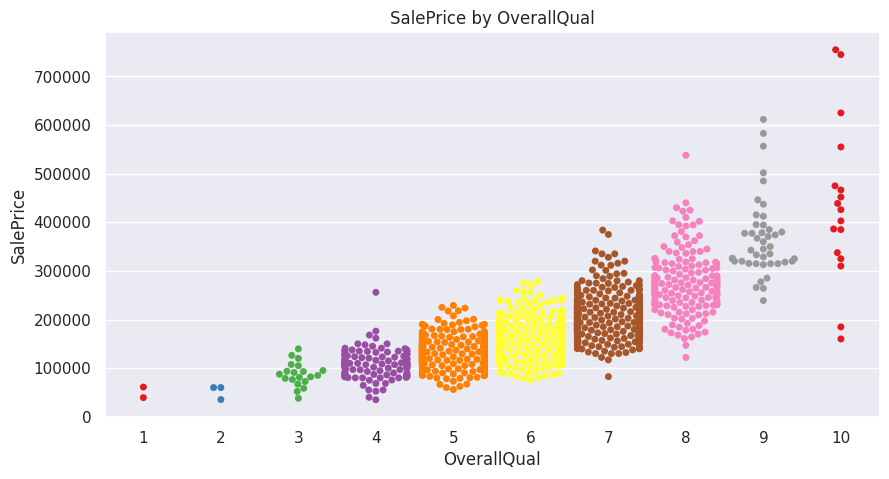

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.swarmplot(data=df, x='OverallQual', y='SalePrice', hue='OverallQual',palette='Set1',legend=False)
plt.title('SalePrice by OverallQual')
plt.show()

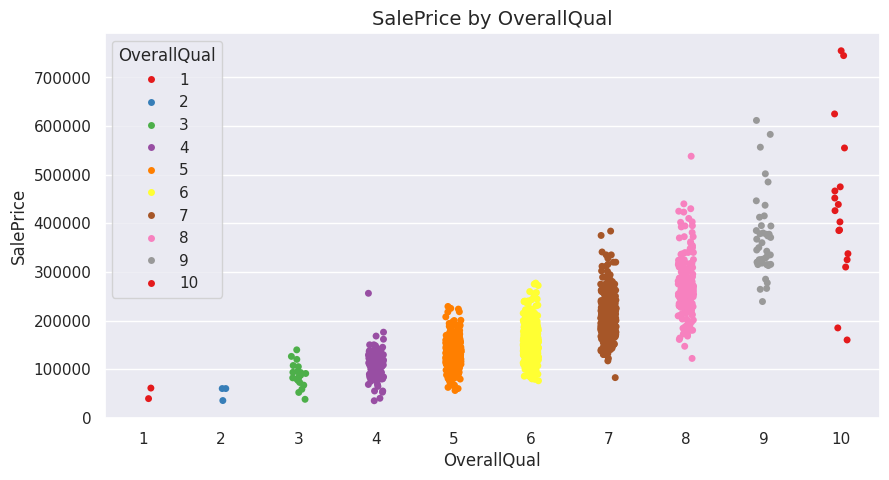

In [ ]:
#Using seaborn to plot Striplot of  SalePrice by OverallQual

plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x='OverallQual', y='SalePrice', hue='OverallQual',palette='Set1', jitter=True)
plt.title('SalePrice by OverallQual',fontsize=14)
plt.show()

We used  'Striplot' which is similar to 'swarmplot' to avoid overlapping points,which is often a better option for a larger dataset.



*   As the quality of the house increases (from left to right on teh x-Axis),the spread of the sale prices tend to shift upwrads.
*   This suggests that houses with higher quality generally sell for higher prices.

*   Within each level of 'OverallQual', there is some variation in 'SalePrice'.
*   This indicates that even for houses of the same quality ,prices can vary ,possibly due to other factors like location, size, or unique features

*  Many houses have the quality rating of(i.e.5,6,7) and there's a range of sale prices for these prices.
*   This evident due to the dense clusters of points in these levels on the x-axis.







**SalePrice  by Grade Living Area**

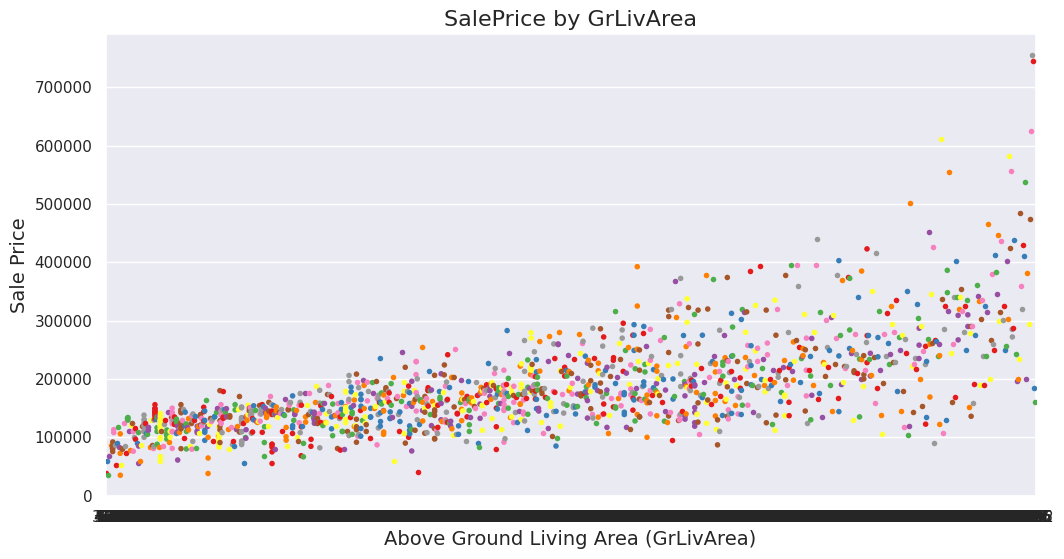

In [ ]:
#Using seaborn to plot Striplot of  SalePrice by GrLivArea

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='GrLivArea', y='SalePrice',hue='GrLivArea', palette='Set1', jitter=True, size=4, legend=False)
plt.title('SalePrice by GrLivArea', fontsize=16)
plt.xlabel('Above Ground Living Area (GrLivArea)', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()



*   As the 'GrLivArea'(above-ground living area) increases,'SalePrice' tends to increase as well.
*   Larger homes generally command higher prices.



*    There is a wide range sale prices for mid-size to larger-sized living areas








**SalePrice  by Garage Cars**

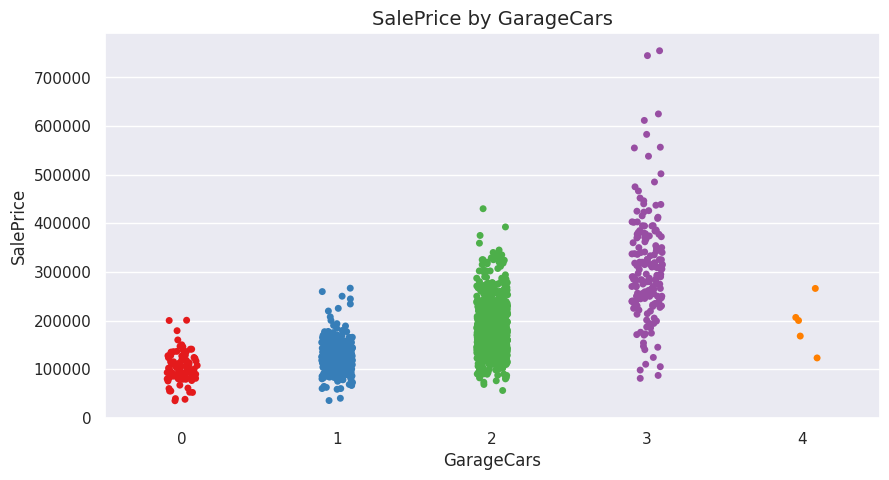

In [ ]:
#Using seaborn to plot Striplot of  SalePrice by GarageCars

plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x='GarageCars', y='SalePrice', hue='GarageCars',palette='Set1', jitter=True, legend=False )
plt.title('SalePrice by GarageCars',fontsize=14)
plt.show()



*   Most houses have 1-3 cars garage space, as points /prices  cluster around these values on  the x-axis.
*   Houses with more garage spaces tend to sell for higher prices.


*   There is a positive correlation, but the effect tends to plateu after 3 cars garage space.






**SalePrice by Garage Area**

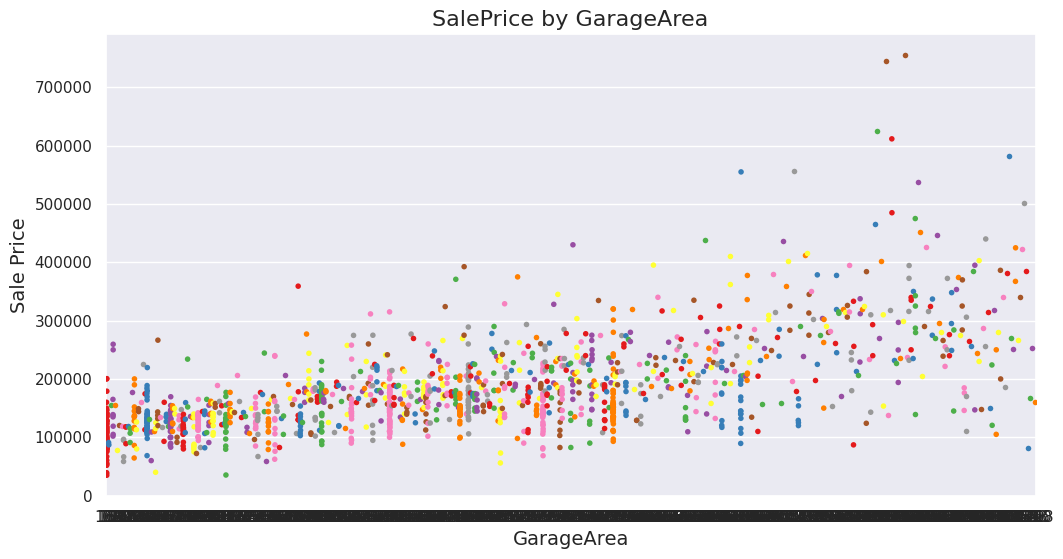

In [ ]:
#Using seaborn to plot Striplot of  SalePrice by GarageArea

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='GarageArea', y='SalePrice',hue='GarageArea', palette='Set1', jitter=True, size=4, legend=False)
plt.title('SalePrice by GarageArea', fontsize=16)
plt.xlabel('GarageArea', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()



*   Similar to 'GarageCarrs' ,'GarageArea' increases,'SalePrice' tends to increase.
*   Larger garages are associated with higher-priced homes.

*   The spread of points is dense for average sized garages but broader with very large sized garages.






**SalePrice by Total Basement Square feet**

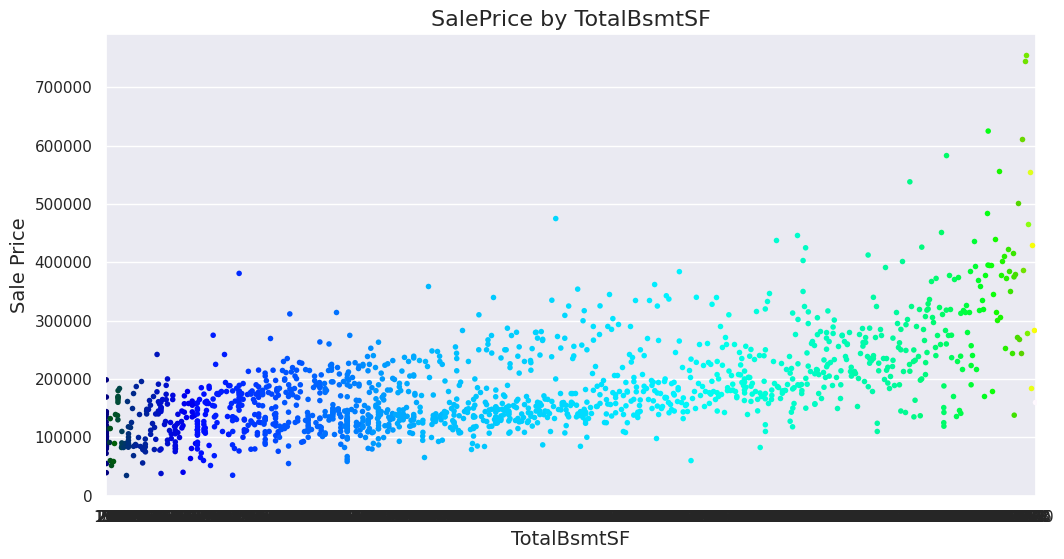

In [ ]:
#Using seaborn to plot Striplot of  SalePrice by TotalBsmtSF

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='TotalBsmtSF', y='SalePrice',hue='TotalBsmtSF', palette='gist_ncar', jitter=True, size=4, legend=False)
plt.title('SalePrice by TotalBsmtSF', fontsize=16)
plt.xlabel('TotalBsmtSF', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()



*   A larger total basement area is positively correlated with salePrice.
*   Houses with more basement tend to generally be more expensive.

*   There is more varaition in sale price for mid-sized to large-sized basement areas.




**SalePrice by First Floor Area**

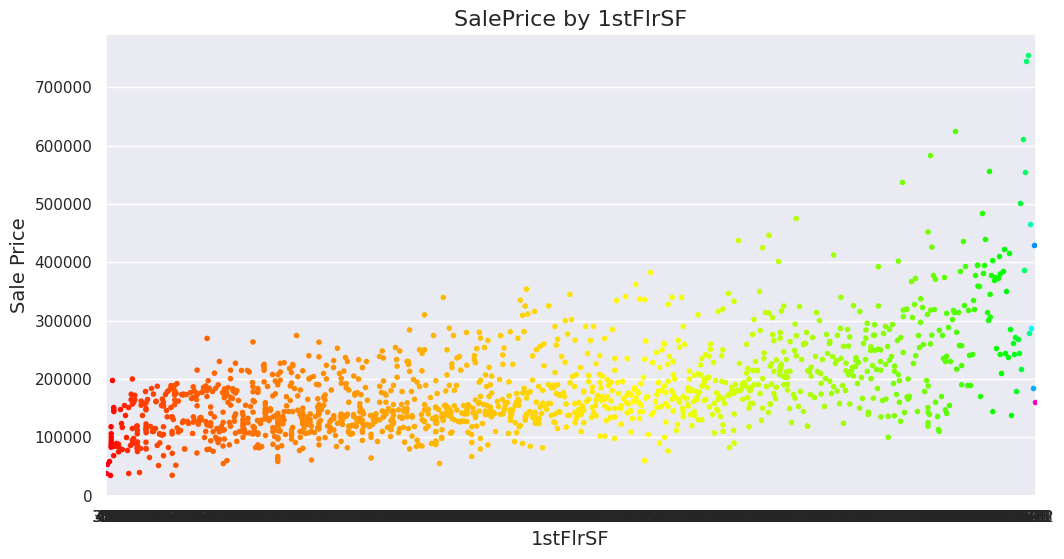

In [ ]:
#Using seaborn to plot Striplot of  SalePrice by 1stFlrSF

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='1stFlrSF', y='SalePrice',hue='1stFlrSF', palette='gist_rainbow', jitter=True, size=4, legend=False)
plt.title('SalePrice by 1stFlrSF', fontsize=16)
plt.xlabel('1stFlrSF', fontsize=14 )
plt.ylabel('Sale Price', fontsize=14)
plt.show()



*   Larger first-floor areas tend to lead to higher sale prices, that suggests that First floor square footage is positively correlated with Saleprice
*   There are more variation in prices for houses with larger and mid sized first floor areas.

*   More houses have small to mid sized first floor areas with more densed cluster of points around these levels.





**SalePrice by Total Rooms Above Ground**

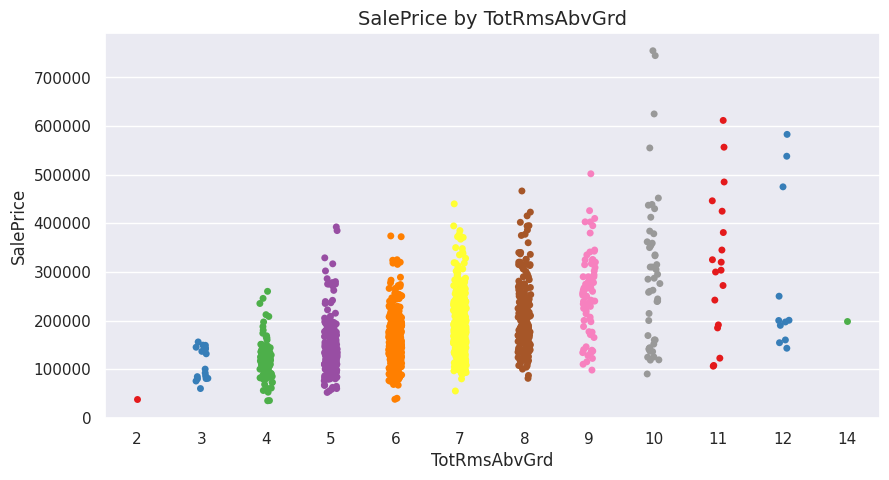

In [ ]:
#Using seaborn to plot Striplot of  SalePrice by TotRmsAbvGrd

plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x='TotRmsAbvGrd', y='SalePrice', hue='TotRmsAbvGrd',palette='Set1', jitter=True, legend=False )
plt.title('SalePrice by TotRmsAbvGrd',fontsize=14)
plt.show()



*   More rooms above ground tend to lead to higher Saleprice , but the relationshipis not perfectly linear.
*   There is a tighter range of prices for homes with a standard number of rooms , with a broader rannge for houses with very many rooms.


*   Most houses have a standard number of rooms as there is a dense cluster of points around these levels.






**SalePrice by Year Built**

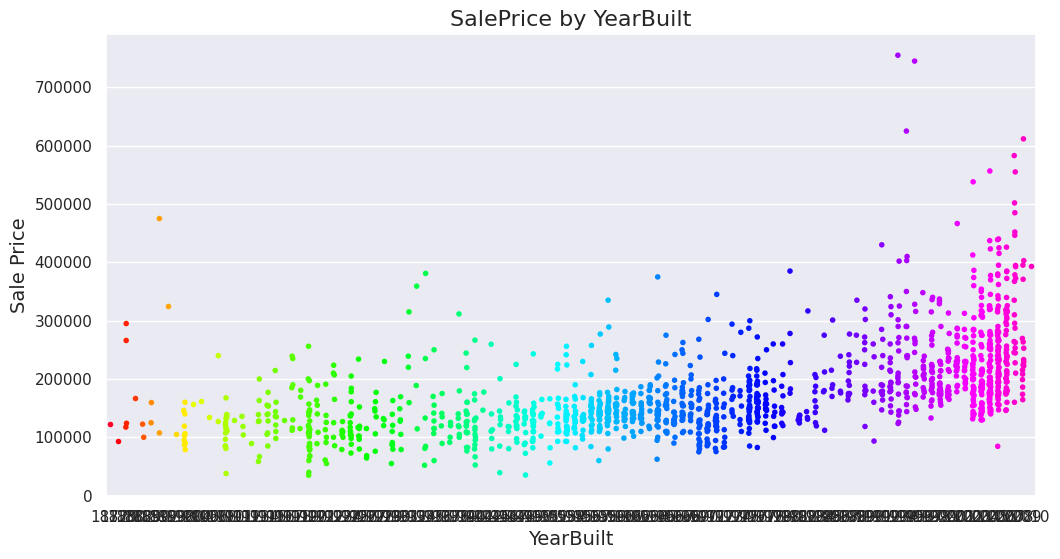

In [ ]:
#Using seaborn to plot Striplot of  SalePrice by YearBuilt

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='YearBuilt', y='SalePrice',hue='YearBuilt', palette='gist_rainbow', jitter=True, size=4, legend=False)
plt.title('SalePrice by YearBuilt', fontsize=16)
plt.xlabel('YearBuilt', fontsize=14 )
plt.ylabel('Sale Price', fontsize=14)
plt.show()



*   Newer homes tend to have higher sale prices , but the relationshipis not linear due  to other factors like renovations.
*   There is less spread for homes built in pre-1900s.




**SalePrice by YearRemodAdd**

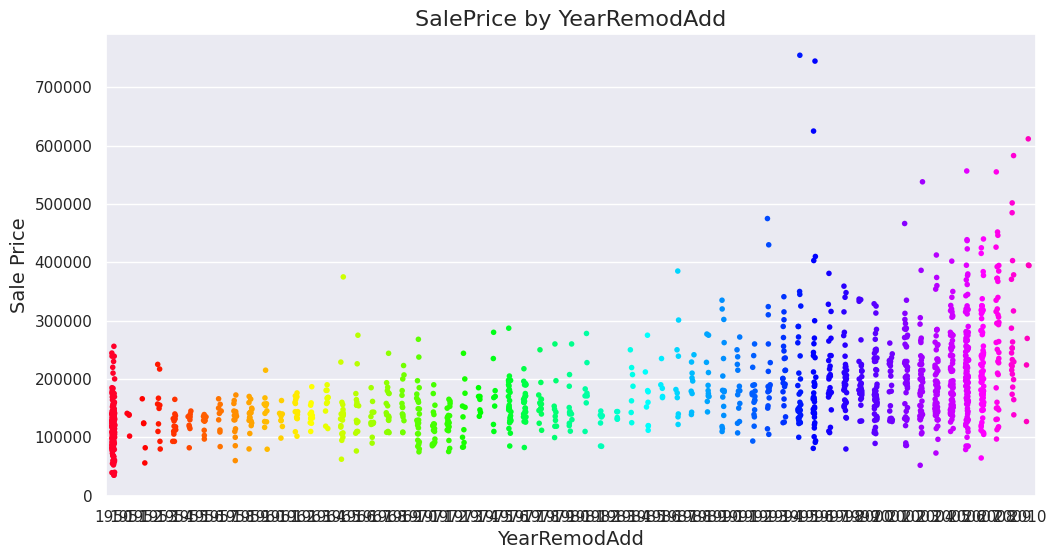

In [ ]:
#Using seaborn to plot Striplot of  SalePrice by YearRemodAdd

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='YearRemodAdd', y='SalePrice',hue='YearRemodAdd', palette='gist_rainbow', jitter=True, size=4, legend=False)
plt.title('SalePrice by YearRemodAdd', fontsize=16)
plt.xlabel('YearRemodAdd', fontsize=14 )
plt.ylabel('Sale Price', fontsize=14)
plt.show()



*   Houses with more recent renovations tend to have higher sale prices,although the orginalconstruction year also matters.




**Overall Quality by YearBuilt**

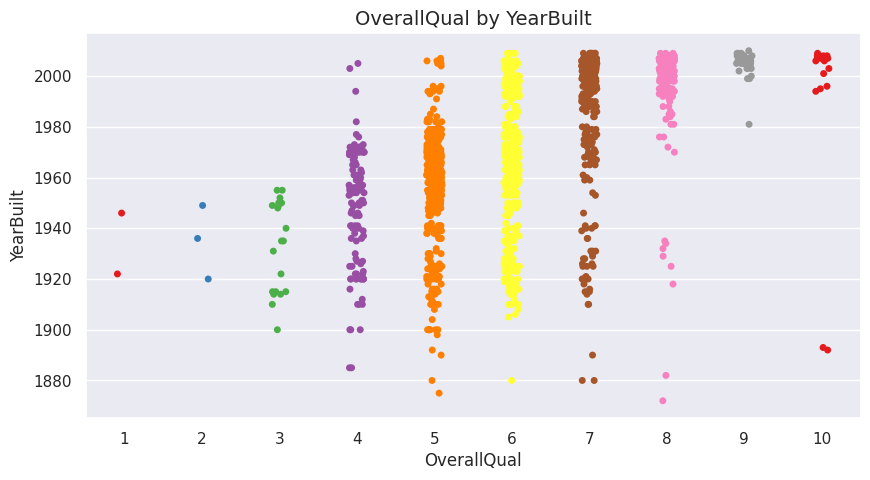

In [ ]:
plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x='OverallQual', y='YearBuilt', hue='OverallQual',palette='Set1', jitter=True, legend=False )
plt.title('OverallQual by YearBuilt',fontsize=14)
plt.show()



*   Higher overall quality corresponds with houses built in more recent years
*   Which could insinuate that construcution standards or preferences have improved over the years



**Overall Quality by Year of Remodel Additions**

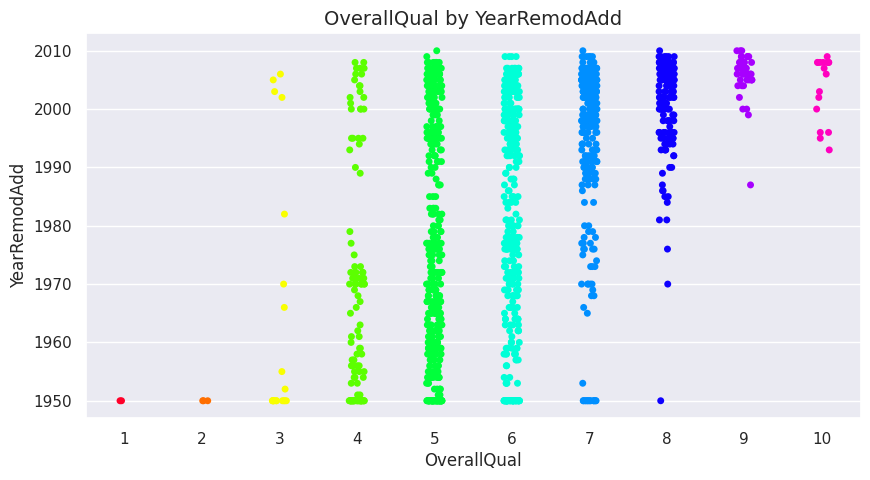

In [ ]:
plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x='OverallQual', y='YearRemodAdd', hue='OverallQual',palette='gist_rainbow', jitter=True, legend=False )
plt.title('OverallQual by YearRemodAdd',fontsize=14)
plt.show()



*   Houses with standard to higher overall quallity tend to have their remodelling done recently



#**Numeric vs Categorical**

**SalePrice By Overall Quality**

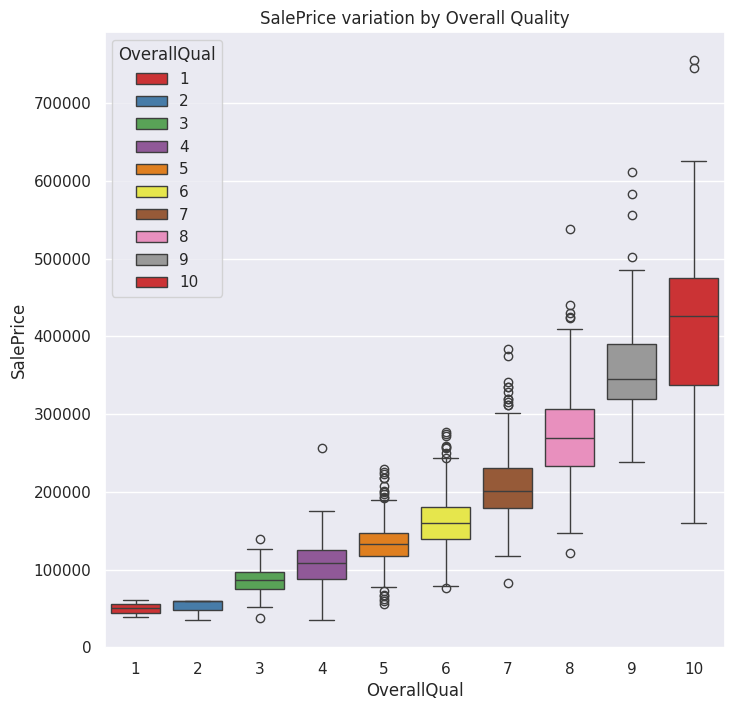

In [ ]:
#Using seaborn to plot boxplot of SalePrice by OverallQual
plt.figure(figsize = (8,8))
sns.boxplot(data = df, x = 'OverallQual', y = 'SalePrice', hue='OverallQual', palette='Set1')
plt.title('SalePrice variation by Overall Quality')
plt.show()



*   Higher Overall Quality corresponds with higher Sale prices
*   The SalePrices for houses in each level of quality vary.


*   The standard quality(i.e. 5,6,7) reflect a lot of outliers in the sale prices.






**Sale Price by Garage Finished**

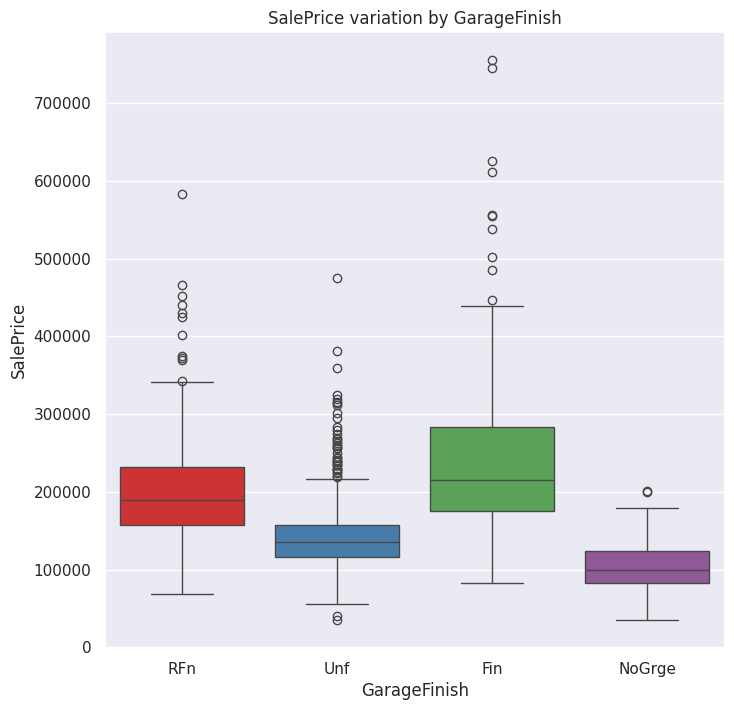

In [ ]:
#Using seaborn to plot boxplot of SalePrice by GarageFinish
plt.figure(figsize = (8,8))
sns.boxplot(data = df, x = 'GarageFinish', y = 'SalePrice', hue='GarageFinish', palette='Set1')
plt.title('SalePrice variation by GarageFinish')
plt.show()



*   Finished garages corresponds with higher sale prices.
*   Approximately 75% of house with finished garages are worth less than approximately 300 000

*  Most houses with  Unfinished garages are outliers to the range of the Sale Price for that category.
*   Houses with no garages tend to be be less expensive with a sale price approximately less than 200 000





**Sale Price by Basement Quality**

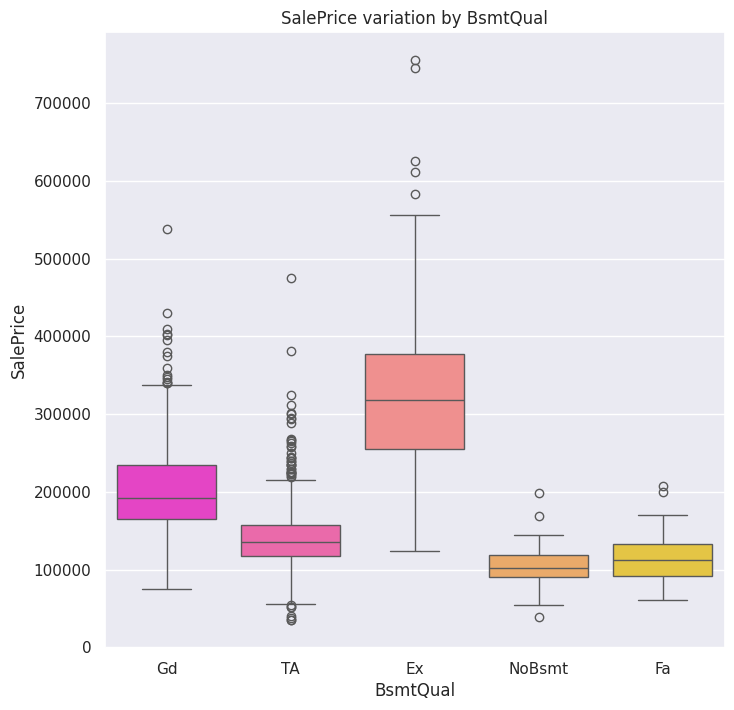

In [ ]:
#Using seaborn to plot boxplot of SalePrice by BsmtQual
plt.figure(figsize = (8,8))
sns.boxplot(data = df, x = 'BsmtQual', y = 'SalePrice', hue='BsmtQual',palette='spring')
plt.title('SalePrice variation by BsmtQual')
plt.show()



*   Houses with higher quality of basement(i.e. Ex,Gd) corresponds with higher saleprices.
*   House with no basement have relatively lower sale prices than house with basements and  with the presence of other houses being outliers to the price range



**Sale Price By Fireplace Quality**

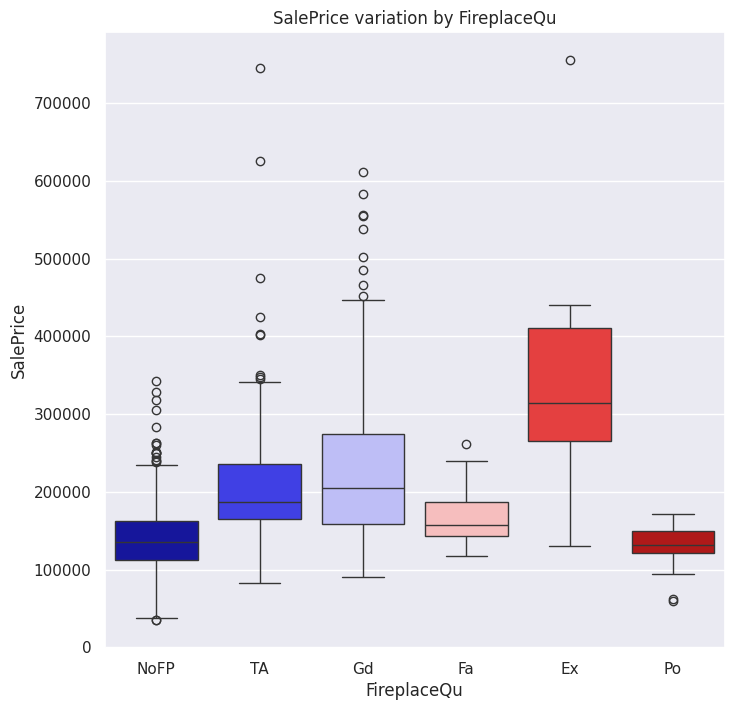

In [ ]:
#Using seaborn to plot boxplot of SalePrice by FireplaceQu
plt.figure(figsize = (8,8))
sns.boxplot(data = df, x = 'FireplaceQu', y = 'SalePrice', hue='FireplaceQu',palette='seismic')
plt.title('SalePrice variation by FireplaceQu')
plt.show()



*   Houses with higher quality fireplaces are associated with higher SalePrices
*   House with no fireplace have lower sale prices but they can also have non-distinctive sale prices compared to houses with lower quality fireplaces(i.e.poor,fair,typical)



**Sale Price by Kitchen Quality**

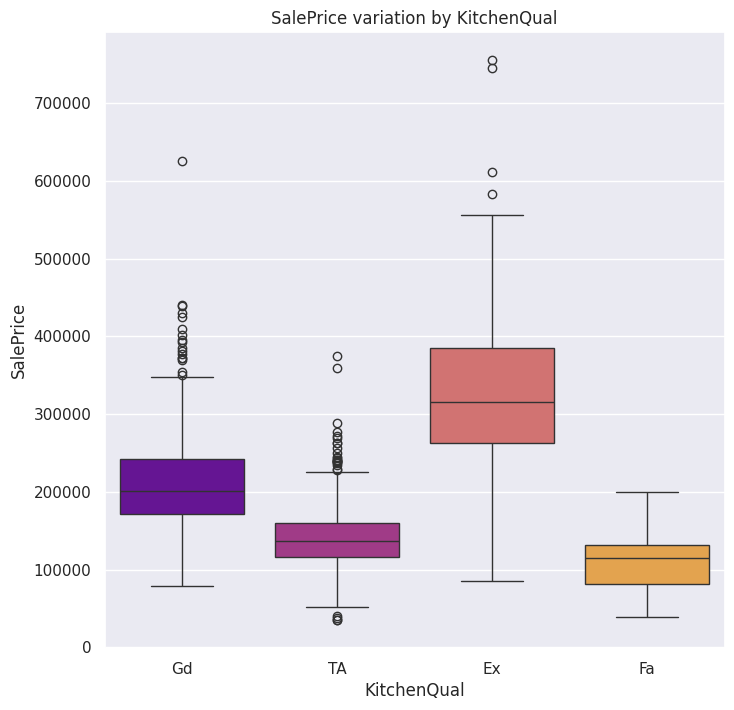

In [ ]:
#Using seaborn to plot boxplot of SalePrice by KitchenQual
plt.figure(figsize = (8,8))
sns.boxplot(data = df, x = 'KitchenQual', y = 'SalePrice', hue='KitchenQual',palette='plasma')
plt.title('SalePrice variation by KitchenQual')
plt.show()



*   Homes with higher(i.e.Ex,Gd) kitchen quality is associated with higher sale prices.
*   Homes with an excellent kitchen qualityis associated with a  Wide range of sale prices.

*   25% of homes with a fair kitchen quality is under 100 000
*     100% of the homes with afair kitchen quality are 200 000 and below





**Sale Price by Exterior Quality**

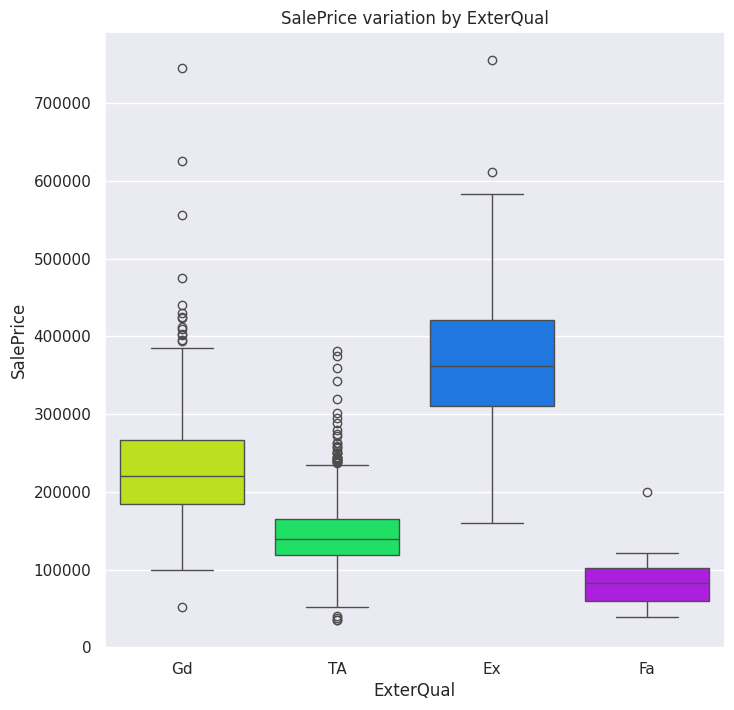

In [ ]:
#Using seaborn to plot boxplot of SalePrice by ExterQual
plt.figure(figsize = (8,8))
sns.boxplot(data = df, x = 'ExterQual', y = 'SalePrice', hue='ExterQual',palette='hsv')
plt.title('SalePrice variation by ExterQual')
plt.show()



*   Houses with higher exterior quality is associated with higher sale prices and a widerrange of sale prices.
*   There are many houses with a typical exterior that lie oustide the central tendency of the sale price.


*   75% of the houses with fair exterior quality is under 100 000 sale price.






#**Categorical vs Categorical**

**GarageFinish vs Basement Quality**

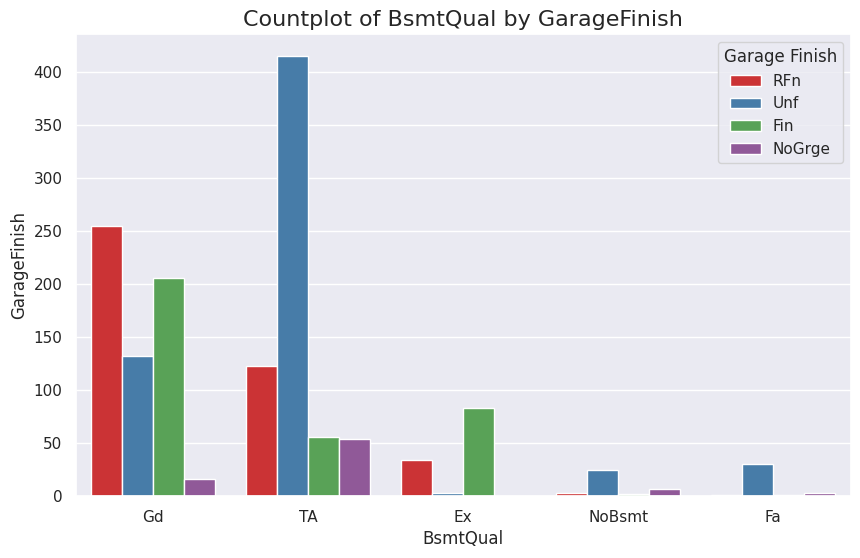

In [ ]:
#Using seaborn to plot CountPlot of BsmtQual by Garage Finish

sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'BsmtQual', hue='GarageFinish',palette = 'Set1',)

plt.xlabel('BsmtQual')
plt.ylabel('GarageFinish')
plt.title('Countplot of BsmtQual by GarageFinish', fontsize=16)
plt.legend(title='Garage Finish', loc='upper right')
plt.show()



   

*   Most houses associated with typical basement quality are associated with unfinished garages.
*   No houses with with a fair basement quality and no basement have finished garages.


*   Most houses that have finished garages are associated with higher basement quality(i.e. Ex,Gd)
*  Houses with no basement is mainly associated to unfinished,roughly finished and  no gargaes





**FirePlace Quality vs Kitchen Quality**

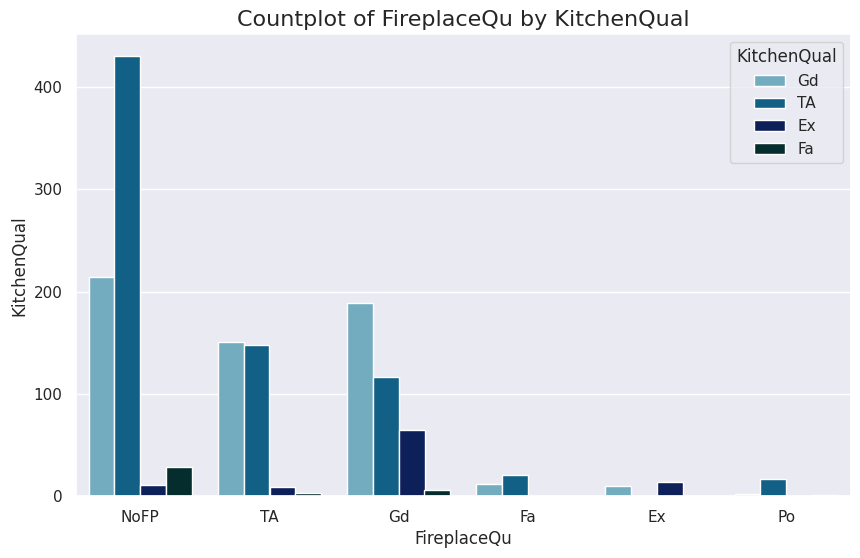

In [ ]:
#Using seaborn to plot CountPlot of FirePlaceQu by KitchenQual

sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'FireplaceQu', hue='KitchenQual',palette = 'ocean_r',)

plt.xlabel('FireplaceQu')
plt.ylabel('KitchenQual')
plt.title('Countplot of FireplaceQu by KitchenQual', fontsize=16)
plt.legend(title='KitchenQual', loc='upper right')
plt.show()



*   The relationship between these features is not really linear.
*   Houses with excellent fireplace quality are  associated with higher  kitchen quality.

*   Most houses with typical and good kitchen quality have no fireplace.
*   Houses with poor fireplace quality is only associated with typical kitchen quality.

*   Houses with typical fireplace quality have most good and typical kitchen quality, which are relatively the same in count.








**Exterior Quality vs Kitchen Quality**

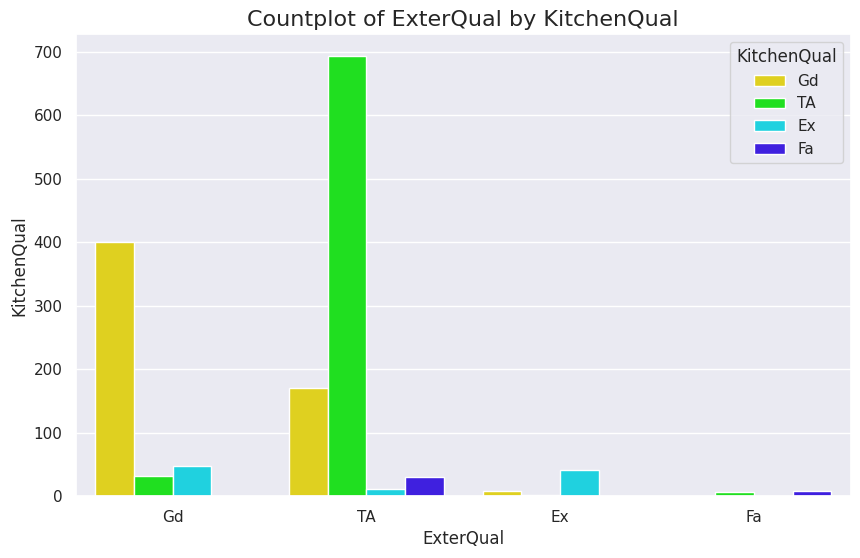

In [ ]:
#Using seaborn to plot CountPlot of ExterQual by KitchenQual

sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'ExterQual', hue='KitchenQual',palette = 'gist_rainbow',)

plt.xlabel('ExterQual')
plt.ylabel('KitchenQual')
plt.title('Countplot of ExterQual by KitchenQual', fontsize=16)
plt.legend(title='KitchenQual', loc='upper right')
plt.show()



*   Houses with excellent exterior quality is mainly associated with higher kitchen quality similarly to houses with good exterior quality.
*   Houses with typical exterior quality is mostly associated with typical kitchen quality.



#**Model Selection and Model Training**

Due to its simplicity of operation, Linear Regression is very interpretable. In the situation
of house prices, each coefficient within a Linear Regression model corresponds to the
effect of a factor (for example, square footage, the number of bedrooms, or the
neighbourhood of the dwelling). For example, a positive coefficient of GrLivArea (above
grade living area) indicates that square meters of above grade living area are positively
related with the price. This interpretability is useful to have when searching for the nature
of relations between distinct factors and their effects on property prices, important when
used by analysts and other stakeholders. Linear Regression works well as a basic model
because of its utility. When the model is being developed, it is recommended to begin with
a basic method before getting to more complex one. The accuracy of the Linear
Regression models can then be used as a baseline against which it is possible to judge
whether more complex models (such as Random Forests, Gradient Boosting Machines)
are adding substantial predictive value. In fact, if Linear Regression does its job, then it
might just suffice and adding a layer of complexity that isn’t needed.


Linear Regression can work with a large amount of data and numerous variables
without the need in powerful computing equipment. If for instance, the dataset contains
81 features and has 1460 instances (as in the house price dataset), it can be trained fast,
and therefore, good when there is the need to run many iterations and tests in quick
succession. Linear Regression in general presupposes a linear dependence of all the
features and the target variable (SalePrice), for many features in the housing market this
assumption is quite reasonable. For instance; GrLivArea, OverallQual, and YearBuilt
may be close to linear non-numeric variables with SalePrice ‘each factor’. If these linear
relationships are dominant, Linear Regression can give the required forecast levels with a
minimal danger of over-approximating the data, compared to more compound nonlinear models in some cases. It also does not have a problem when multiple features are
very correlated with each other, for instance, through the use of Ridge Regression that is
a variant of Linear Regression. TotalBsmtSF, and GrLivArea are very related real estate
features, and Ridge Regression is used to stabilize working coefficients for this model.
